# Matt Kearney - CS 559 - HW8

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

DF = pd.read_csv('Hitters.csv')

 #### b. [15 pts] The data set is raw data set and it needs to be trained before applying base learners. There are a few missing targets and three discrete features, while the rest are continuous. Impute the missing target values with a mean value. Convert the text features to integers. Split the data set into train and test sets in the ratio of 8 to 2. Calculate the standard deviation of the test target. This will be used as a target error value.

In [233]:
m, n = DF.shape
print(f"({m}, {n})")
DF.describe()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [234]:
DF.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


#### Find missing values

In [235]:
DF.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [236]:
mean_salary = DF['Salary'].mean()
mean_salary

535.9258821292775

#### Impute mean salary into missing observations

In [237]:
for obs in range(0,m):
    if (pd.isna(DF['Salary'][obs])):
        DF.loc[obs, 'Salary'] = mean_salary

DF['Salary'].fillna(mean_salary, inplace=True)
DF['Salary'].head() # check that mean was imputed

0    535.925882
1    475.000000
2    480.000000
3    500.000000
4     91.500000
Name: Salary, dtype: float64

#### We should also change 'League', 'Division', and 'New League' from labels (characters) to integers.

In [238]:
print("Different leagues: \t", DF['League'].unique())
print("Different divisions: \t", DF['Division'].unique())
print("Different new leagues: \t", DF['NewLeague'].unique())

DF['League'] = DF['League'].replace({'A': 0, 'N': 1})
DF['Division'] = DF['Division'].replace({'E': 0, 'W': 1})
DF['NewLeague'] = DF['NewLeague'].replace({'A': 0, 'N': 1})
        
print("Different leagues: \t", DF['League'].unique())
print("Different divisions: \t", DF['Division'].unique())
print("Different new leagues: \t", DF['NewLeague'].unique())


Different leagues: 	 ['A' 'N']
Different divisions: 	 ['E' 'W']
Different new leagues: 	 ['A' 'N']
Different leagues: 	 [0 1]
Different divisions: 	 [0 1]
Different new leagues: 	 [0 1]


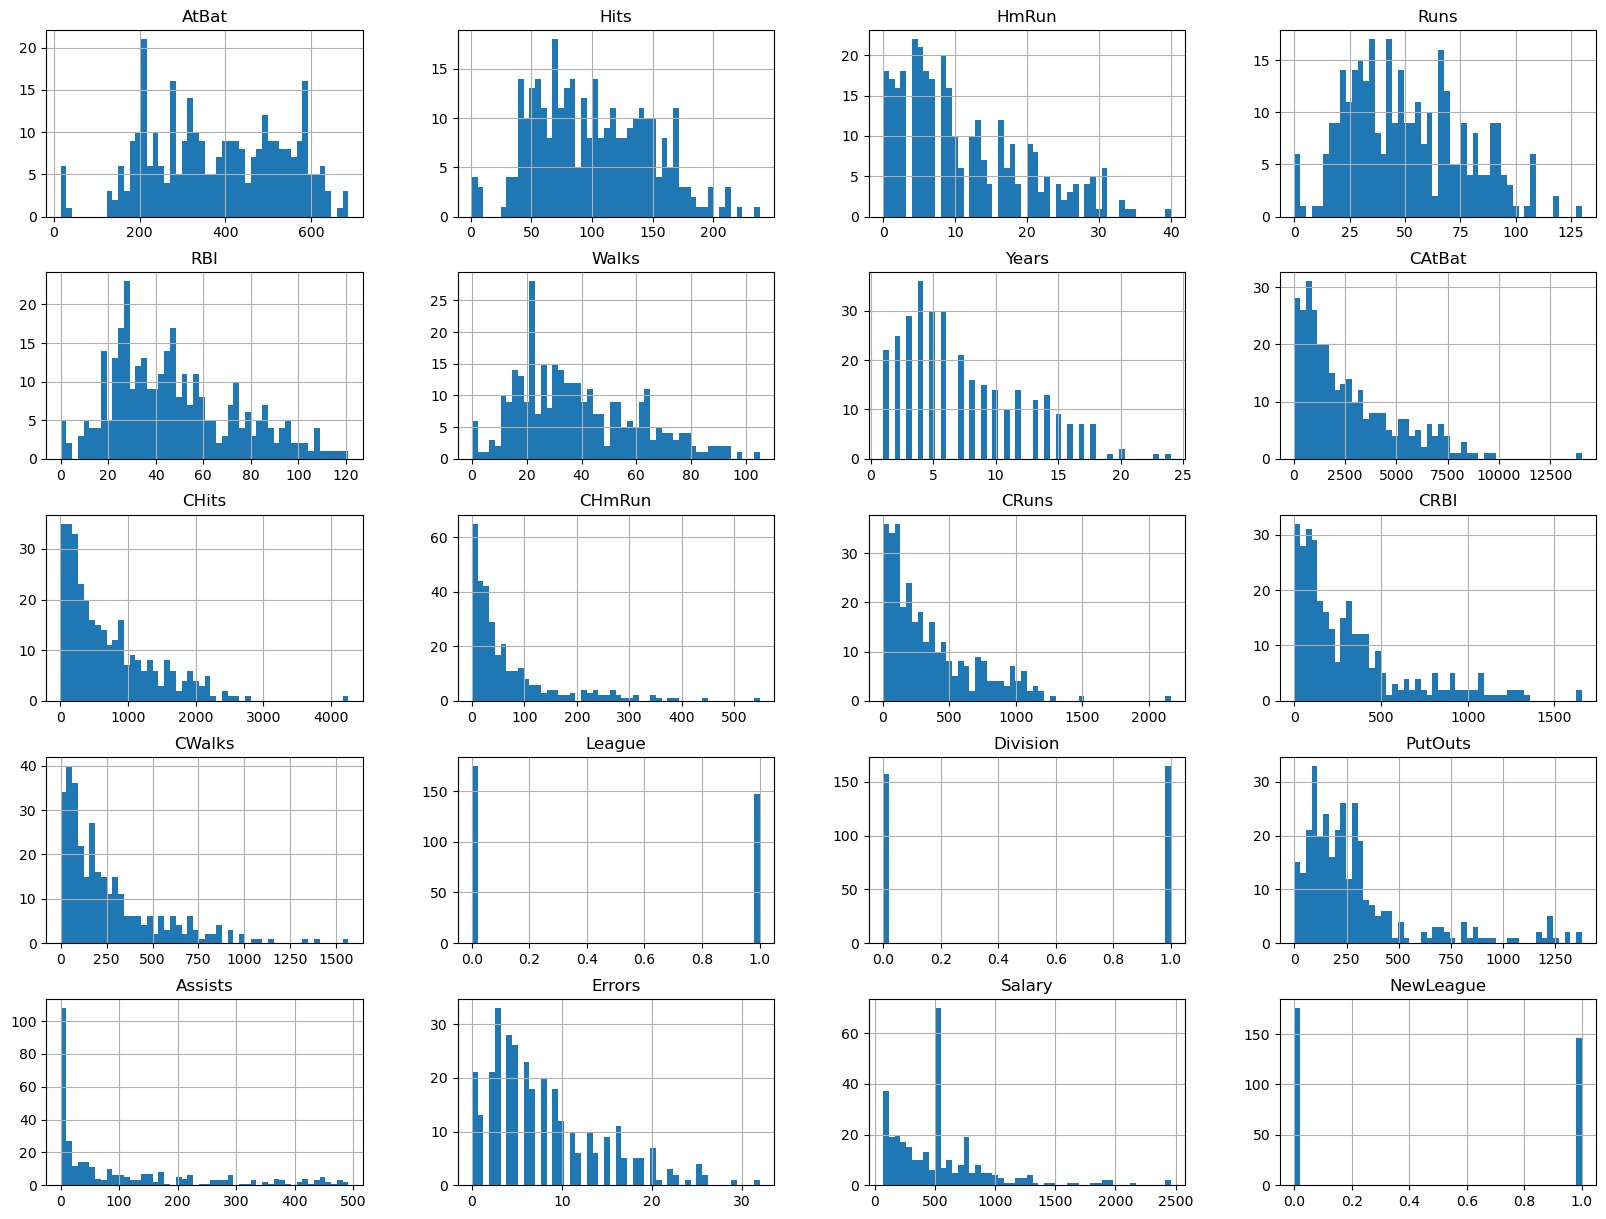

In [239]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

Note: June 4, 2024 <br>
Imputing with the mean may not be the right choice, we should recognize in hindsight the feasibility of using the values that are already missing as our test. It is a prime opportunity to do so, and not introduce bias into the data, as there are 59 missing targets which is about 20% of the observations.

#### Splitting the data 4:1 training:test

In [240]:
X = DF.drop('Salary', axis = 1)
y = DF['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len_DF = len(DF)
print("supsected: \n\tsize of train: ",  0.8*len_DF, "\n\tsize of test: ", 0.2*len_DF)

print("sklearn: \n\tsize of train: ",  len(X_train), "\n\tsize of test: ", len(X_test))

supsected: 
	size of train:  257.6 
	size of test:  64.4
sklearn: 
	size of train:  257 
	size of test:  65


#### We can note that sklearn gave the extra observation to the test set

In [241]:
mean = y_test.mean()
acc = 0
for i in range(0, len(y_test)):
    acc = acc + (y_test.iloc[i] - mean)**2

stdev_formula = np.sqrt(acc / len(y_test))
target_error = y_test.std()

print(f"standard deviation by formula: \n\t{stdev_formula}\npandas standard deviation calculation:\n\t{target_error}\n")

print(f"\nWe will say standard deviation or target error is {y_test.std()}")


standard deviation by formula: 
	463.7408122676651
pandas standard deviation calculation:
	467.34974461340573


We will say standard deviation or target error is 467.34974461340573


#### The formula and the pandas standard deviation calcualtions are roughly the same, where mine is consisently about 2-3 [units of Salary] below pandas.

#### c. [15 pts] Write a method that returns the new features from the base learners. Base learners can be any algorithms discussed in the lecture. There are no limits on base learner trials, but only three base learners will be collected and used in the meta-learning process. Explain why you choose them as base learners.

We may want to visualize our data so we can get an idea for the best-qualified base learners. Before taking a deeper dive into the data, I am interested in implementing a non-linear Kernel SVM, decision trees or random forest, kNN and neural networks with non-parametric activation functions are all possible. 

In [242]:
corr_matrix = DF[DF.columns.tolist()].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,-0.101663,-0.045441,0.317550,0.353824,0.352117,0.342474,-0.057655
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,-0.101038,-0.071143,0.310673,0.320455,0.310038,0.384974,-0.060608
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,-0.177258,-0.017206,0.282923,-0.106329,0.039318,0.311615,-0.166044
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,-0.150392,-0.076311,0.279347,0.220567,0.240475,0.372257,-0.115446
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,-0.145597,-0.075531,0.343186,0.106591,0.193370,0.401647,-0.120124
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,-0.045337,-0.059086,0.299515,0.149656,0.129382,0.402465,-0.020029
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.047261,0.021126,-0.004684,-0.080638,-0.162140,0.352235,-0.042919
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,-0.028738,0.022965,0.062283,0.002038,-0.066922,0.467636,-0.016502
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,-0.025790,0.013584,0.076547,-0.002523,-0.062756,0.491152,-0.010047
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,-0.098383,0.006783,0.112724,-0.158511,-0.138115,0.451876,-0.097461


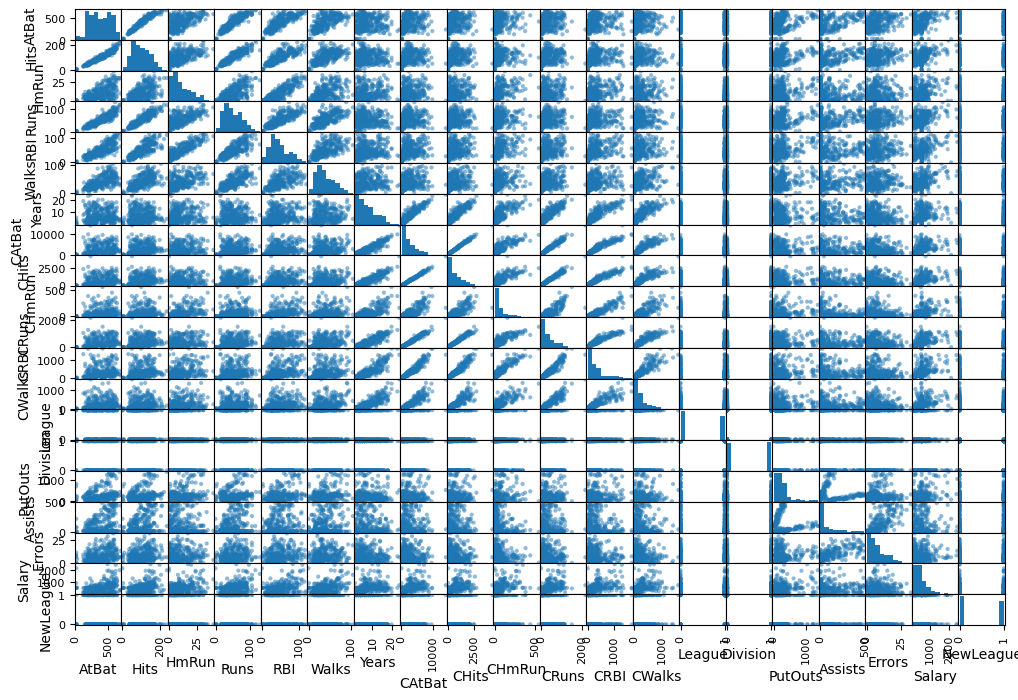

In [243]:
from pandas.plotting import scatter_matrix

scatter_matrix(DF[DF.columns.tolist()], figsize=(12,8))
plt.show()

While the above scatter plot may be hard to draw conclusions from, we are able to enlarge some of the specific plots that show great correlations. Over our entire dataset, we can see generally high correlations, but not all of them are very correlated and while some of them are highly correlated. This is evident as if we are able to look at the scatter plot and the scatter matrix together, we can visually and analytically see the relation of high correlation values in deep orange and red pockets as well as the plotted linear relationships. We will want to ensure that our base models are capable of observing these sparse but real patterns. <br><br>
Those with intensive baseball domains may desire and value a more symbolic relationship of these variables at play and how many insights can be driven to improve the model. I will use my limited baseball understanding to understand as much about the data as possible, at which point I will give my faith to divserse non-parametric models such that we can make (hopefully) more accurate predictions than possible from a single model. Let's take a look at examples of a pair of loosely correlated features and then a pair of highly correlated features so we can get a general premise of the data. While it may not be a valuable use of our time to research baseball statistics, we should try to understand the degree of correlation and the general underlying patterns identifiable in the data.

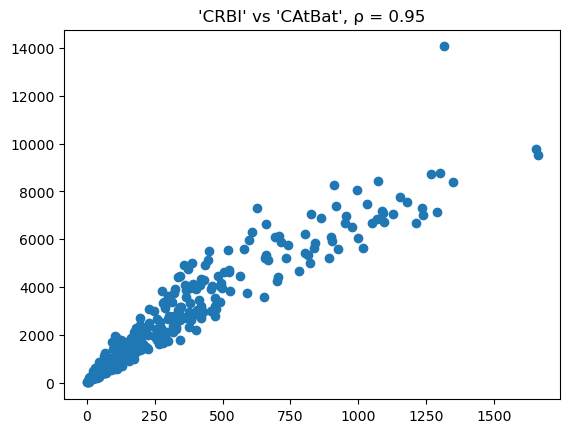

In [244]:
plt.scatter(DF['CRBI'], DF['CAtBat'])
plt.title(f"'CRBI' vs 'CAtBat', ρ = {round(corr_matrix['CAtBat']['CRBI'], 2)}")
plt.show()

Above is a view of a highly correlated pair of features. Below are two quite loosely correlated pairs of variables.

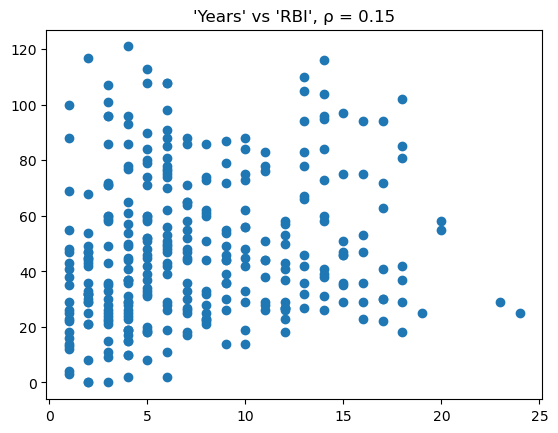

In [245]:
plt.scatter(DF['Years'], DF['RBI'])
plt.title(f"'Years' vs 'RBI', ρ = {round(corr_matrix['Years']['RBI'], 2)}")
plt.show()

Stacking architecture inspired by
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/#:~:text=The%20architecture%20of%20a%20stacking,and%20whose%20predictions%20are%20compiled.

Let's get the new feature predictions from the below models.

In [246]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as randomforest
from sklearn.svm import SVR

knn_m = KNN()
rf_m = randomforest()
svr_m = SVR()


# new_features(X) --> return the 'new' data from each base learner
def new_features(X_train, y_train):
    knn_m.fit(X_train, y_train)
    rf_m.fit(X_train, y_train)
    svr_m.fit(X_train, y_train)

    knn_pred = knn_m.predict(X_train)
    rf_pred = rf_m.predict(X_train)
    svr_pred = svr_m.predict(X_train)

    return np.column_stack((knn_pred, rf_pred, svr_pred))

x_base = new_features(X_train, y_train)
x_base

array([[ 859.        , 1237.28642646,  530.28724752],
       [ 832.61377643, 1498.11507293,  540.44827954],
       [ 409.67035285,  351.51684643,  502.86955226],
       [  90.        ,  162.73888232,  494.07067042],
       [ 530.        ,  446.79168878,  530.44415524],
       [ 950.51837643,  518.53885867,  536.62296934],
       [ 242.08517643,  168.96370529,  496.23846261],
       [ 481.03715285,  381.97895529,  521.74996125],
       [ 443.7407057 ,  865.55990513,  493.13241948],
       [ 514.3334    , 1029.41632   ,  530.43741716],
       [ 330.77035285,  444.96792924,  497.1958484 ],
       [ 257.87035285,  189.45221171,  493.53558153],
       [ 683.51837643,  372.36018703,  535.37728526],
       [ 935.4286    ,  562.95488529,  540.85045041],
       [ 453.68517643,  620.38610646,  514.70264021],
       [ 539.05552928,  626.51106221,  540.85279013],
       [ 385.        ,  344.97055293,  504.03748797],
       [ 280.51857643,  273.47332939,  497.53691468],
       [ 106.5       ,  136.

It's possible that the k-nearest neighbors and the random forest models maybe overfitting the data, which may decrease accuracy score. If this maintains an issue then scaling may be employed to mitigate these concerns. I chose these base learners as they are all non-parametric models which I thought were diverse enough to capture patters effectively in the dataset. 

#### d. [15 pts] Then build a meta-learner. Investigate which base learner is the highest contributor and explain why it is so. This should be done with a train data set, not the test data set. Check if the MSE value is within 10% of the target error chosen from Question a. If not,  determine the dominant type of the error, either bias or variance. Then, improve the model by upgrading the train set and regularizing the meta learner until the MSE value falls within 10% of the target error.

In [247]:
# Investigate which base learner is the highest contributor and explain why it is so. 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as err

meta_learner = LinearRegression()
meta_learner.fit(x_base, y_train)

learned_weights = meta_learner.coef_
index = np.argmax(np.abs(learned_weights))
highest_weight = learned_weights[index]

print("learned weights:", learned_weights)
print("highest base weight: ", highest_weight)

meta_pred = meta_learner.predict(x_base)
mse = err(y_train.tolist(), meta_pred)

print(f"mse: \t\t{mse}")
print(f"target error: \t{target_error}")
print(f"ten percent of target error: \t{0.1*target_error}")

learned weights: [-0.19724114  1.32485839 -1.00402686]
highest base weight:  1.3248583899352355
mse: 		6956.36719793158
target error: 	467.34974461340573
ten percent of target error: 	46.73497446134058


The support vector machine regressor consistently has the greatest value weight, meaning that it is consisently the most accurate in finding the generalized model with minimized error. The feature that came from the SVM-regressor is the the greatest contributor to final predictions as it holds the most weight.

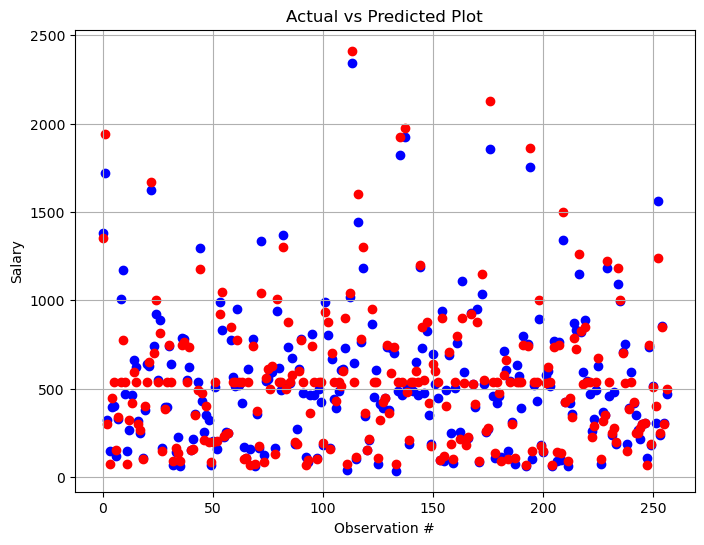

In [248]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(range(0, len(y_train)), meta_pred,  color='blue', label = 'predictions')
plt.scatter(range(0, len(y_train)), y_train, color='red', label = 'train data target')


plt.xlabel('Observation #')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Plot')
plt.grid(True)
plt.show()

In [249]:
std_preds = meta_pred.std()

print("our predictions have sdev =", std_preds)
print("our train target has stdev = ", target_error)

our predictions have sdev = 382.25078802850095
our train target has stdev =  467.34974461340573


Looking at the above plot, we can see that the model does make some visible learnings. For any pair of points in the same observation, we are able to see that the actual targets have more of a variance than our predictions. With this, our predictions never match the true target appropriately as our prediction is *almost* always straggling behind the true value, whether or not it's on the low or high side. While this isn't always true, the general pattern in the data suggests that my predictions aren't accurate to the model. While this plot doesn't show a traditional overfit, we can see often that the predicted value sometimes effectively reaches the true value, and othertimes (more often) it just shows that it guessed in the right direction. This shows the evidence of potentially high variance or overfit in the data as our model has become too complex.

Alternatively, bias could be the more dominant type of error. I follow the argument that by imputing the mean salary for all observations that are missing heavily mitigates (introduces a 'neutral' bias) into the model which is accounting for a severe underfit. I believe this could introduce levels of bias as it ceases the models ability to make efficient conclusions as a large fraction of the dataset needed 'Salary' data imputed. By imputing the mean salary on all of these missing observations, this means that we likel gave many great players with high salaries as well as players with low salaries the same mean salary value. While this may be negligible with a small number of missing targets, there is a certain limit (percentage) of outliers we should impute ourselves as this inherently introduces model bias. While model bias can be hard to control particularly when we are unaware of potential areas of bias, we have surely introduced a bias that acts as a neutralizing force that stops our values from reaching as close to the true values as possible. By imputing the mean, we have changed the natural variance and pattern of the train data meaning that our predictions reflect this bias. My belief is that bias is the main form of error in my model. 

#### Upgrade the train data

I may choose to scale the data. Currently, our data is likely disproportionately scaled which may be mitiguting our model from capturing patterns. 

I also did not love the choice to use the mean of all of the baseball players for the missings. I have options to impute another value, drop these columns, or even make my own prediction based on the variables. It was found that by imputing with a median value greatly lowered mse to be less than the mse previously. It was found that dropping the rows with missing salary was ineffective, and surprisingly (to me) only increased MSE. 

In [250]:
DF_c = pd.read_csv('Hitters.csv')


median_salary = DF_c['Salary'].median()
DF_c['Salary'].fillna(median_salary, inplace=True) #inputed median instead
# DF_c = DF_c.dropna()
m_c, n_c = DF_c.shape 

print("data reduction from previous data set dropping rows with missing target: ", 1 - m_c/m)

data reduction from previous data set dropping rows with missing target:  0.0


In [251]:
DF_c.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

Losing nearly 20% of the total data and where we already had a small set to begin with my draw concerns and issues. However, if we end with better predictions on less amount of the training data, then we should actually hope for the new model with dropped rows to perform better. We can easily see how performance will change with the small adjustment of not letting the machine learn any of our bias. 

In [252]:
DF_c['League'] = DF_c['League'].replace({'A': 0, 'N': 1})
DF_c['Division'] = DF_c['Division'].replace({'E': 0, 'W': 1})
DF_c['NewLeague'] = DF_c['NewLeague'].replace({'A': 0, 'N': 1})
DF_c.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League         int64
Division       int64
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague      int64
dtype: object

In [253]:
# from sklearn.preprocessing import StandardScaler as SS
# scaler = SS()
# DF_c[DF_c.columns.tolist().remove(['Salary'])] = scaler.fit_transform(DF_c[DF_c.columns.tolist().remove(['Salary'])])

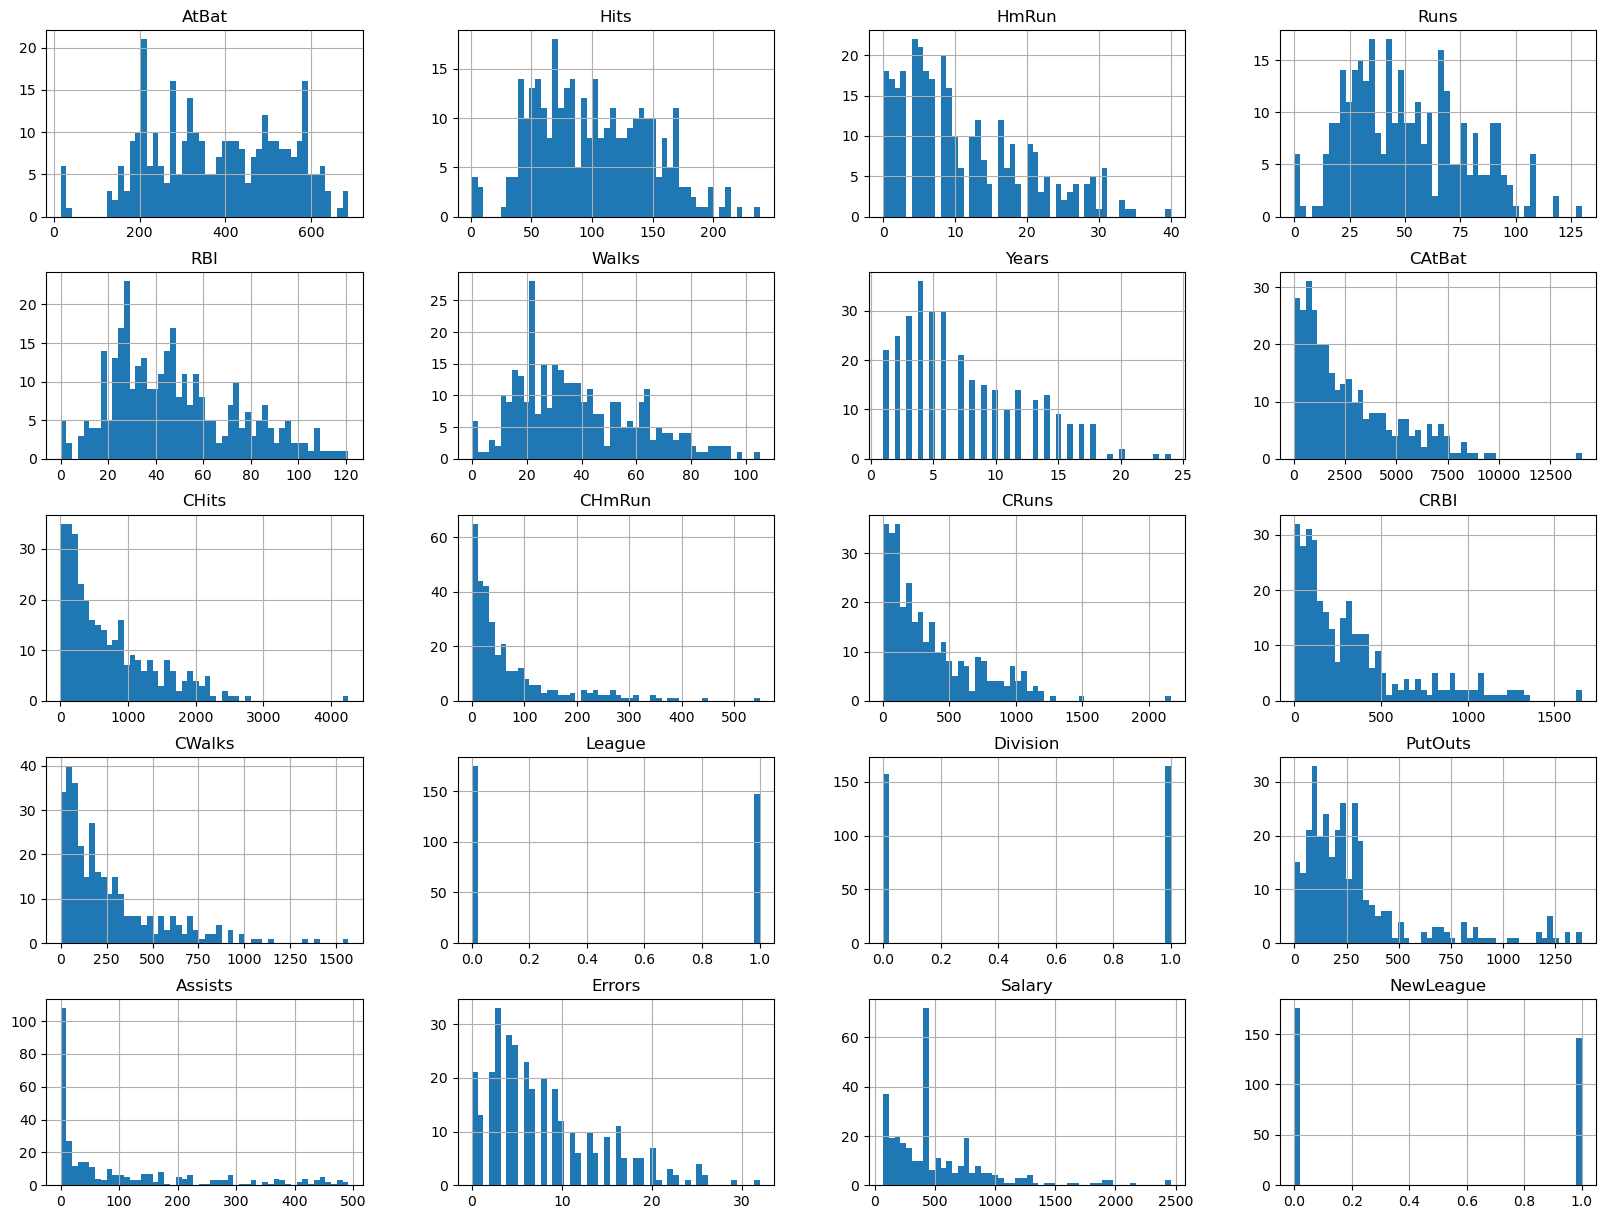

In [254]:
DF_c.hist(bins=50, figsize=(20,15))
plt.show()

We no longer have an abundance (58) of observations that had a mean target which introduced bias. Instead, we have a trade off where we have less data available to the model, however, it should be possible to draw insights and make closer predictions from the data available. 

In [255]:
from sklearn.preprocessing import StandardScaler

X_c = DF_c.drop('Salary', axis = 1)
y_c = DF_c['Salary']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2)

x_base_c = new_features(X_train_c, y_train_c)
x_base_c

array([[ 407.1668    ,  381.65024   ,  434.33780858],
       [ 317.        ,  372.79167   ,  414.18024178],
       [ 408.3334    ,  555.09169   ,  436.12389382],
       [ 164.5       ,  126.065     ,  407.1935738 ],
       [ 211.6       ,  116.155     ,  406.358722  ],
       [ 194.        ,  144.81      ,  409.38217322],
       [ 431.5       ,  601.50001   ,  427.27977827],
       [ 345.        ,  311.90001   ,  416.47499692],
       [ 101.5       ,  120.415     ,  407.55758859],
       [ 645.        ,  450.7       ,  451.44545292],
       [ 635.        ,  753.24998   ,  450.5747204 ],
       [ 605.        ,  506.41666   ,  449.9999999 ],
       [ 482.5       ,  454.925     ,  419.05243624],
       [ 203.4       ,  158.605     ,  409.07835044],
       [ 620.8334    ,  399.85855   ,  446.13070509],
       [ 947.        , 1465.95      ,  452.02779491],
       [ 765.        ,  872.55333   ,  447.40932567],
       [ 216.        ,  172.235     ,  411.13239624],
       [ 159.5       ,  143.

In [256]:
from sklearn.linear_model import Lasso


alpha = [0.1, 0.2, 0.3, 0.4, 0.5]  #
mses = []

for i in alpha:
    # meta_learner_c = Ridge(alpha=i)
    meta_learner_c = Lasso(alpha=i)

    # apply model to the base learner predictions
    meta_learner_c.fit(x_base_c, y_train_c)

    learned_weights = meta_learner.coef_
    index = np.argmax(np.abs(learned_weights))
    highest_weight = learned_weights[index]

    meta_pred_c = meta_learner_c.predict(x_base_c)
    mse_c = err(y_train_c.tolist(), meta_pred_c)
    mses.append(mse_c)


print(f"mse: \t\t{mse_c}")
print(f"previous mse: \t{mse}")
print(f"target error: \t{target_error}")
print(f"ten percent of target error: \t{0.1*target_error}")
print(mses)

mse: 		7517.289519737067
previous mse: 	6956.36719793158
target error: 	467.34974461340573
ten percent of target error: 	46.73497446134058
[7517.287552740316, 7517.287798752671, 7517.288209019756, 7517.288782911049, 7517.289519737067]


Lasso regression with the smallest parameters allows us to minimize errors, but they are all negligibly close to each other.

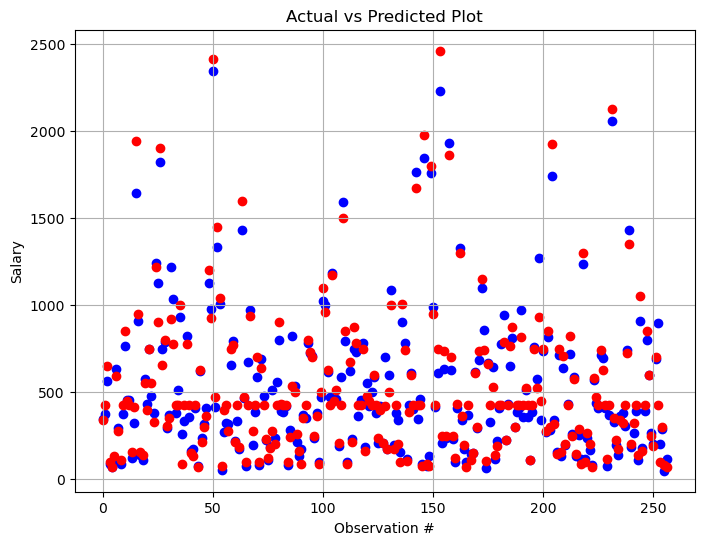

In [257]:
plt.figure(figsize=(8, 6))
plt.scatter(range(0, len(y_train_c)), meta_pred_c,  color='blue', label = 'predictions')
plt.scatter(range(0, len(y_train_c)), y_train_c, color='red', label = 'train data target')

plt.xlabel('Observation #')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Plot')
plt.grid(True)
plt.show()

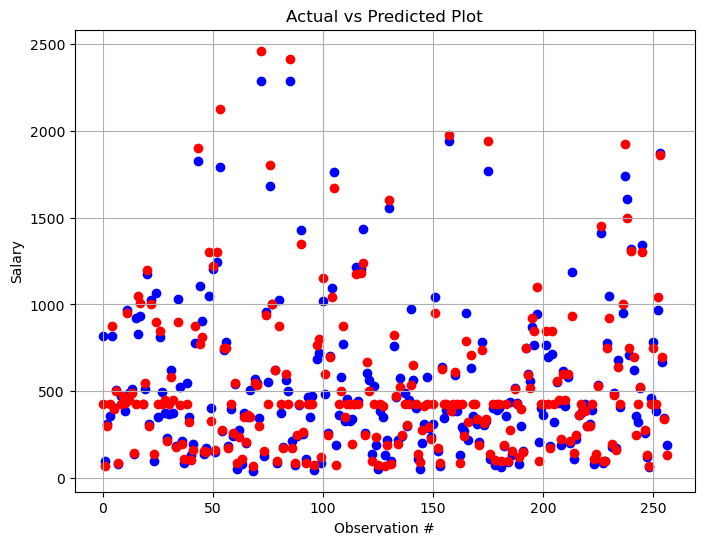

In [258]:
print("target stdev", "\t\tmy prediction stdev")
print(y_train.std(), f"\t{meta_pred.std()}")

target stdev 		my prediction stdev
392.0076144310378 	382.25078802850095


Our predictions above (imputed median, Lasso regularization) in blue seem to make better fits to the targets now compared to as below (imputed mean). I say this as our predicted values are now able to reach higher and getting closer to predicted values. 

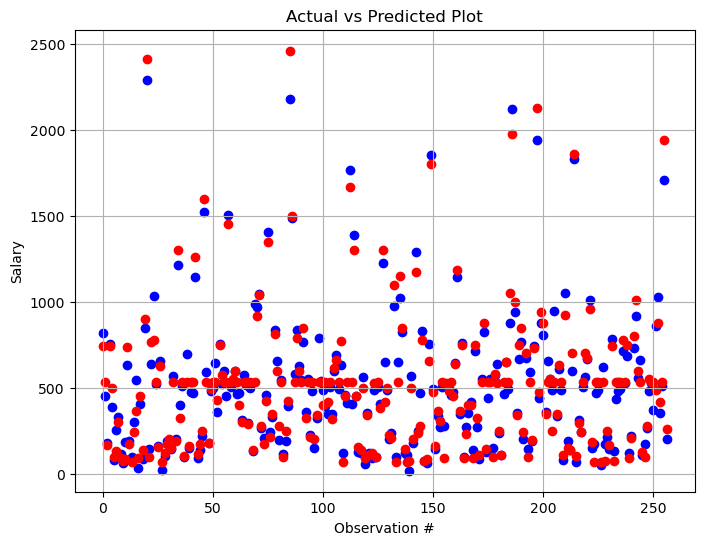

In [259]:
print("target stdev", "\t\tmy prediction stdev")
print(y_train_c.std(), f"\t{meta_pred_c.std()}")

target stdev 		my prediction stdev
428.15562066980647 	418.4299956114579
